<a href="https://colab.research.google.com/github/MuhammadHatta72/machine-learning-semester5/blob/main/midterm/Kmeans1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from skimage import io, img_as_float
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
def print_distortion_distance(cluster_prototypes, points_by_label, k):
    distances = np.zeros((k,))

    for k_i in range(k):
        if (points_by_label[k_i] is not None):
            distances[k_i] += np.linalg.norm(points_by_label[k_i] - cluster_prototypes[k_i], axis=1).sum()
        else:
            distances[k_i] = -1

    print('Distortion Distances:')
    print(distances)


def k_means_clustering(image_vectors, k, num_iterations):
    # Create corresponding label array (Initialize with Label: -1)
    labels = np.full((image_vectors.shape[0],), -1)

    # Assign Initial Cluster Prototypes
    cluster_prototypes = np.random.rand(k, 3)

    # Iteration Loop
    for i in range(num_iterations):
        print('Iteration: ' + str(i + 1))
        points_by_label = [None for k_i in range(k)]

        # Label them via closest point
        for rgb_i, rgb in enumerate(image_vectors):
            # [rgb, rgb, rgb, rgb, ...]
            rgb_row = np.repeat(rgb, k).reshape(3, k).T

            # Find the Closest Label via L2 Norm
            closest_label = np.argmin(np.linalg.norm(rgb_row - cluster_prototypes, axis=1))
            labels[rgb_i] = closest_label

            if (points_by_label[closest_label] is None):
                points_by_label[closest_label] = []

            points_by_label[closest_label].append(rgb)

        # Optimize Cluster Prototypes (Center of Mass of Cluster)
        for k_i in range(k):
            if (points_by_label[k_i] is not None):
                new_cluster_prototype = np.asarray(points_by_label[k_i]).sum(axis=0) / len(points_by_label[k_i])
                cluster_prototypes[k_i] = new_cluster_prototype

        # Find Current Distortion Distances
        print_distortion_distance(cluster_prototypes, points_by_label, k)

    return (labels, cluster_prototypes)


def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

Iteration: 1
Distortion Distances:
[23426.1896213  72858.54604238]
Iteration: 2
Distortion Distances:
[41568.12486978 27238.17750779]


NameError: ignored

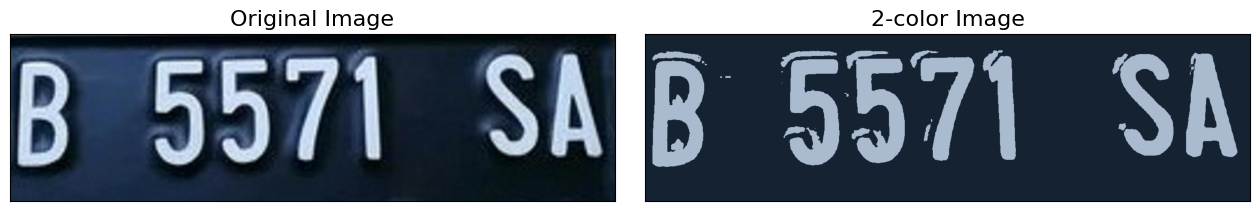

In [4]:
image = io.imread('/content/drive/MyDrive/Machine Learning-Semester 5/UTS/dummy/B5571SA_PNG.rf.1886d7f87e9c5f4e9eb170e1c04656c6.jpg')[:, :, :3]  # Always read it as RGB (ignoring the Alpha)
image = img_as_float(image)
image_dimensions = image.shape

image_vectors = image.reshape(-1, image.shape[-1])


labels, color_centroids = k_means_clustering(image_vectors, k=2, num_iterations=2)

output_image = np.zeros(image_vectors.shape)
for i in range(output_image.shape[0]):
    output_image[i] = color_centroids[labels[i]]

output_image = output_image.reshape(image_dimensions)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(output_image)
ax[1].set_title('2-color Image', size=16)

data = image.reshape(h * w, ch)
plot_pixels(data, title='Input color space: 16 million possible colors')
data = output_image.reshape(h * w, ch)
plot_pixels(data, title='Input color space: 16 million possible colors')
